## Лабораторная работа 10. Матчасть DL

### Реализовала нейронную сеть с архитектурой из трёх нейронов, предложенной в статье, с помощью классов Neuron и Model и их методов

In [72]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

epochs = 10000
lr = 0.1

def sigmoid (x):
    return 1/(1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

class Neuron:
    def __init__(self, w, b):
        self.weights = w
        self.bias = b
        self.df = 0
        
    def forward(self, x):
        return sigmoid(np.dot(x,self.weights)+self.bias)
    
    def backward(self, x, pred, loss):
        global hidden_weights, output_weights,hidden_bias, output_bias
        self.df = loss * sigmoid_derivative(x)
        self.weights = pred.T.dot(self.df) * 0.1
        self.bias = np.sum(self.df,axis=0,keepdims=True) * 0.1
    
class Model:
    def __init__(self, a, b, c, d):
        self._inputs = 0
        self._hidden_weights = a
        self._output_weights = b
        self._hidden_bias = c
        self._output_bias = d
        self._hidden_layer_output = 0
        self.h1 = Neuron(self._hidden_weights, self._hidden_bias)
        self.o1 = Neuron(self._output_weights, self._output_bias)

    def forward(self, x):
        self._inputs = x
        self._hidden_layer_output = self.h1.forward(x)
        return self.o1.forward(self._hidden_layer_output)
    
    def backward(self, x, loss):
        global hidden_weights, output_weights,hidden_bias, output_bias
        self.o1.backward(x, self._hidden_layer_output, loss)
        error_hidden_layer = self.o1.df.dot(output_weights.T)
        output_weights += self.o1.weights
        output_bias += self.o1.bias
        self.h1.backward(self._hidden_layer_output, self._inputs, error_hidden_layer)
        hidden_weights += self.h1.weights
        hidden_bias += self.h1.bias

def loss(y, label):
    return label - y

for _ in range(epochs):
    model = Model(hidden_weights, output_weights,hidden_bias, output_bias )
    y = model.forward(inputs)
    err = loss(y, expected_output)
    model.backward(y, err)
print(*y)

[0.05547053] [0.94889135] [0.94875859] [0.05532913]


### В итоге обучения предсказываются значения, аналогичные статье: 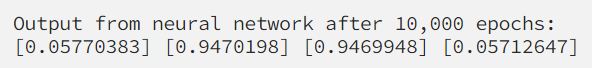